In [1]:
from ipycanvas import Canvas
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np
import tqdm

width = 200
height = 200

In [2]:
def on_event(kwargs):    
    x = 0.5 * width
    y = 0.5 * height
    angle = 0
#     length = 0.5 * height
    if kwargs['name'] == 'value':
        r = kwargs['new']
        length = kwargs['new']
    else:
        raise Exception()
#     draw_circle(r,x,y)
    draw_triangle(length,angle, x, y)
    data = canvas.get_image_data()
#     plt.imshow(data)
    
    

def draw_circle(radius, x=.5*width, y=.5*height):
    canvas.clear()
    canvas.fill_circle(x,y,radius)
    
def draw_triangle(radius, angle, x=.5*width, y=.5*height):
#     radius = length/np.sqrt(3)
    a = rot(angle).dot(np.array([0, radius]))
    b = rot(120).dot(a)
    c = rot(120).dot(b)
    m = np.array([x,y])
    
    canvas.clear()
    canvas.fill_polygon([a+m,b+m,c+m])
    
    
def rot(angle_deg):
    angle = np.deg2rad(angle_deg)
    return np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
    



In [3]:
canvas = Canvas(width=width, height=height, sync_image_data=True)
canvas.fill_style = '#000000'
canvas

Canvas(height=200, sync_image_data=True, width=200)

In [4]:
w = ipywidgets.IntSlider()
w.observe(on_event, names='value')
w

IntSlider(value=0)

In [5]:
class GenerateShapes:
    def __init__(self, ncircle, ntriangle):
        self.shapes = np.empty(shape=(ncircle+ntriangle, height, width))
        self.counter = 0

    def add_shape(self, *args, **kwargs):
        print("adding shape")
        self.shapes[self.counter] = canvas.get_image_data()[..., 0]  # select first channel=R
        self.counter += 1
        
ncircle = 10
ntriangle = 10

generator = GenerateShapes(ncircle, ntriangle)
canvas.observe(generator.add_shape, 'image_data')

# circles
radii = np.random.uniform(0, .5*min(width, height), ncircle)
for n, radius in tqdm.tqdm(enumerate(radii)):
    draw_circle(radius)
    
# triangles
radii = np.random.uniform(0, .5*min(width, height), ntriangle)
angles = np.random.uniform(0, 360, ntriangle)
for n, radius in tqdm.tqdm(enumerate(radii)):
    angle = angles[n]
    draw_triangle(radius, angle)


10it [00:00, 1257.66it/s]
10it [00:00, 827.80it/s]


In [6]:
labels = np.zeros(ncircle+ntriangle, dtype=int)
# circle=0, triangle=1
labels[ncircle:] = 1

In [7]:
indices = np.random.choice(ncircle+ntriangle, size=ncircle+ntriangle, replace=False)
generator.shapes = generator.shapes[indices]
labels = labels[indices]

In [8]:
np.savez_compressed('shapes.npz', X=generator.shapes, y=labels)

In [9]:
!du -hs shapes.npz

8.0K	shapes.npz


In [10]:
fd = np.load('shapes.npz')
X = fd['X']
y = fd['y']
fd.close()

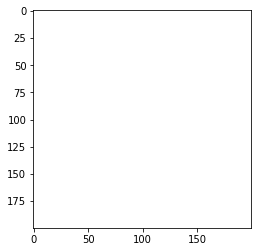

In [11]:
plt.imshow(X[0], cmap='binary')